In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load test and train data

load_test = pd.read_csv(r"C:\Users\ACER\Desktop\pyreach\to pc\churn prediction\TEST.csv")
load_train = pd.read_csv(r"C:\Users\ACER\Desktop\pyreach\to pc\churn prediction\TRAIN.csv")

In [4]:
load_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 16 columns):
Customer ID                                    1400 non-null object
network_age                                    1400 non-null float64
Customer tenure in month                       1400 non-null float64
Total Spend in Months 1 and 2 of 2017          1400 non-null float64
Total SMS Spend                                1400 non-null float64
Total Data Spend                               1400 non-null float64
Total Data Consumption                         1400 non-null float64
Total Unique Calls                             1400 non-null float64
Total Onnet spend                              1400 non-null float64
Total Offnet spend                             1400 non-null float64
Total Call centre complaint calls              1400 non-null float64
Network type subscription in Month 1           1225 non-null object
Network type subscription in Month 2           1256 non-null object

In [7]:
reduced_1 = load_train[load_train.columns.difference(['Customer ID'])]
reduced_1

,Churn Status,Customer tenure in month,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Network type subscription in Month 1,Network type subscription in Month 2,Total Call centre complaint calls,Total Data Consumption,Total Data Spend,Total Offnet spend,Total Onnet spend,Total SMS Spend,Total Spend in Months 1 and 2 of 2017,Total Unique Calls,network_age
0,0.0,4.10,Uxaa,Mango,2G,2G,2.0,1.495100e+00,1.25,6408.0,564.0,0.00,76.7140,14.0,123.0
1,0.0,43.87,Uxaa,Mango,2G,2G,1.0,1.024400e+00,1.25,4373.0,1626.0,4.14,98.8904,27.0,1316.0
2,0.0,79.50,Weematel,Mango,2G,2G,1.0,6.089800e+00,1.25,22039.0,10411.0,3.51,372.6300,119.0,2385.0
3,0.0,53.80,0,Mango,2G,2G,1.0,3.344700e+00,1.25,6274.0,6822.0,6.85,530.2000,69.0,1614.0
4,0.0,72.50,Weematel,Mango,2G,3G,1.0,6.732040e+05,153.75,7241.0,3387.0,6.99,554.1300,33.0,2175.0
5,0.0,5.27,Uxaa,Mango,2G,2G,1.0,1.077136e+05,108.75,16636.0,7296.0,28.63,792.1144,101.0,158.0
6,0.0,3.67,Zintel,Mango,2G,2G,2.0,1.491020e+01,0.00,71699.0,22176.0,1.75,1090.5000,303.0,110.0
7,1.0,18.60,Uxaa,Mango,2G,2G,1.0,1.915330e+01,0.00,444.0,12.0,7.17,29.5464,4.0,558.0
8,1.0,3.83,Mango,Mango,2G,3G,1.0,2.013527e+05,11.25,3563.0,0.0,6.76,62.2520,13.0,115.0
9,1.0,62.27,Mango,Mango,2G,2G,1.0,4.401846e+02,31.25,4254.0,0.0,23.49,120.1204,23.0,1868.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# the percentage sign is to see the plot all within the notebook else it pops up new windows.

In [9]:
load_train.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

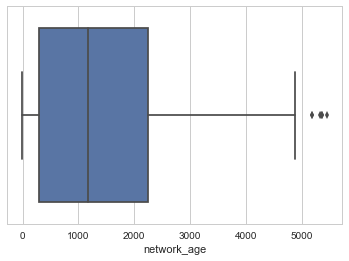

In [10]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = load_train['network_age'])
# saving the graph
plt.savefig("Network_age.png", format = 'png')

In [11]:
network_age_filtered = load_train[load_train['network_age'] < 5000]
network_age_filtered

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.495100e+00,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.024400e+00,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.089800e+00,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.344700e+00,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,6.732040e+05,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0
5,ADF0066,158.0,5.27,792.1144,28.63,108.75,1.077136e+05,101.0,7296.0,16636.0,1.0,2G,2G,Uxaa,Mango,0.0
6,ADF0068,110.0,3.67,1090.5000,1.75,0.00,1.491020e+01,303.0,22176.0,71699.0,2.0,2G,2G,Zintel,Mango,0.0
7,ADF0072,558.0,18.60,29.5464,7.17,0.00,1.915330e+01,4.0,12.0,444.0,1.0,2G,2G,Uxaa,Mango,1.0
8,ADF0079,115.0,3.83,62.2520,6.76,11.25,2.013527e+05,13.0,0.0,3563.0,1.0,2G,3G,Mango,Mango,1.0
9,ADF0085,1868.0,62.27,120.1204,23.49,31.25,4.401846e+02,23.0,0.0,4254.0,1.0,2G,2G,Mango,Mango,1.0


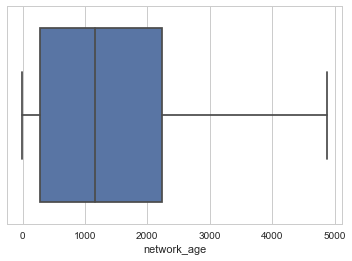

In [12]:
ax = sns.boxplot(x = network_age_filtered['network_age'])
plt.savefig("Network_age.png1", format = 'png')

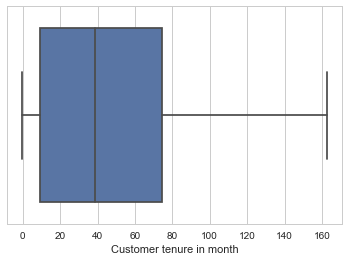

In [14]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Customer tenure in month'])
# saving the graph
plt.savefig("Customer_tenure1.png", format = 'png')

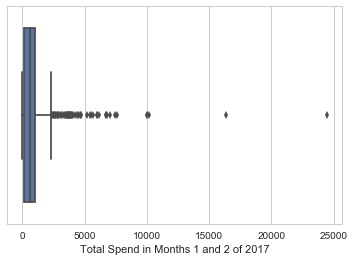

In [15]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Spend in Months 1 and 2 of 2017'])
# saving the graph
plt.savefig("Total spend in months 1 and 2.png", format = 'png')

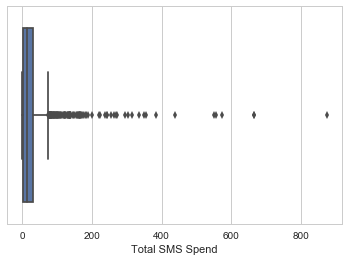

In [17]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total SMS Spend'])

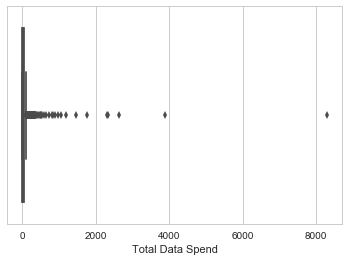

In [19]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Data Spend'])

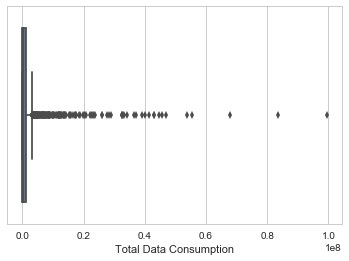

In [20]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Data Consumption'])

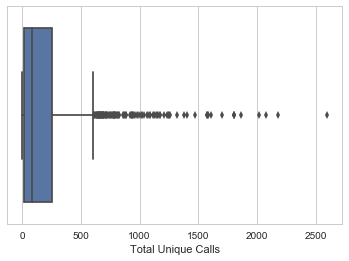

In [21]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Unique Calls'])

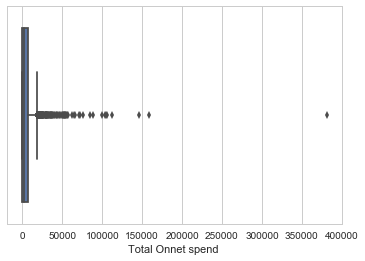

In [23]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Onnet spend '])

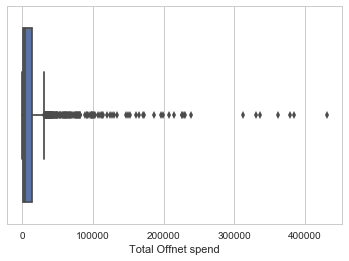

In [24]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Offnet spend'])

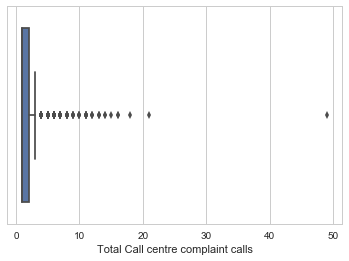

In [25]:
sns.set_style("whitegrid")
ax = sns.boxplot(x = network_age_filtered['Total Call centre complaint calls'])

In [16]:
load_train.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [28]:
hist_data = network_age_filtered[['network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017','Total SMS Spend','Total Data Spend','Total Data Consumption','Total Unique Calls',
                                 'Total Onnet spend ','Total Offnet spend','Total Call centre complaint calls']]

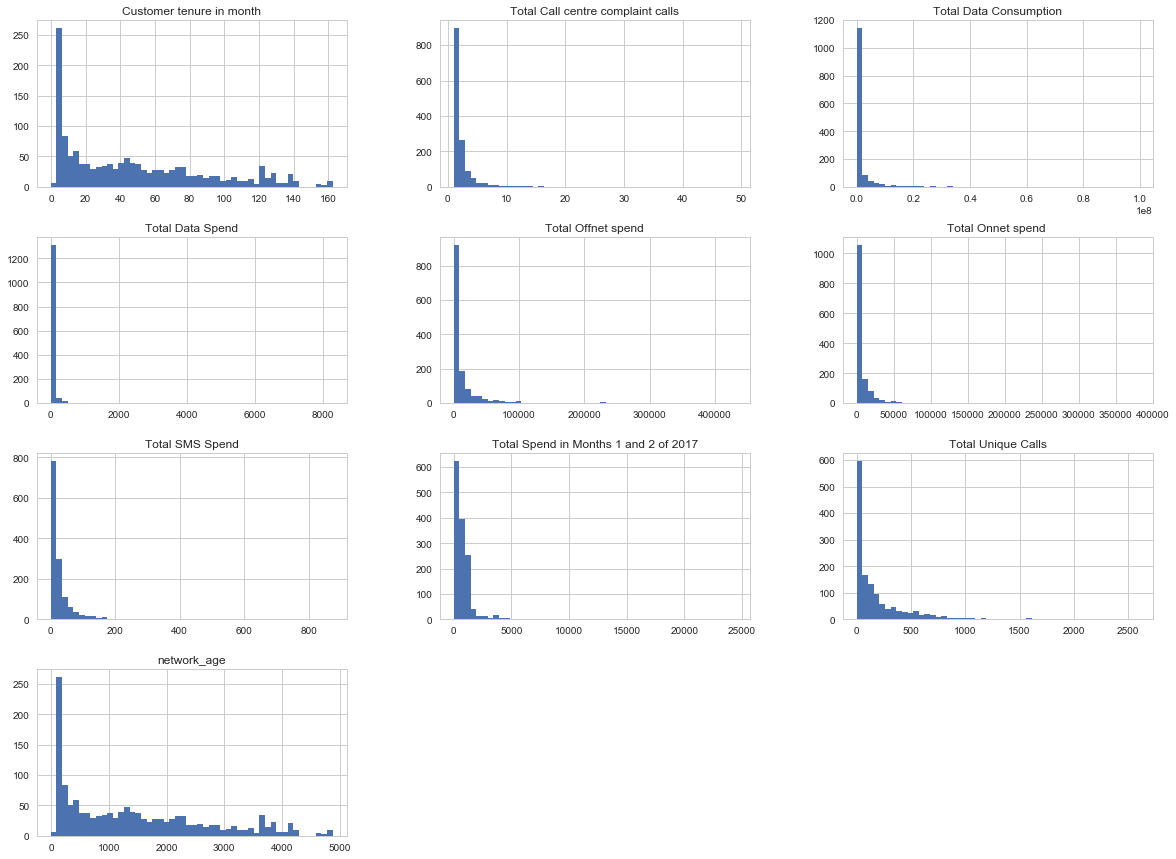

In [31]:
hist_data.hist(bins = 50, figsize = (20,15))
plt.show()
plt.savefig('hist_data plot1.JPEG',format = 'JPEG',dpi = 720)

In [32]:
# total spend in months 1 and 2, total sms spend, total data spend, total data consumption, Total unique calls, total onnet spend, 
#total offnet spend, Total call center complaints calls

In [37]:
# mapping categorical variables load_train['Most Loved Competitor network in in month 2].values_counts()

mapped_dict = {'Uxaa':1, 'PQza':2, 'Mango':3, 'ToCall': 4, 'Weematel': 5, 'Zintel':6, '0': 0}
load_train['Most Loved Competitor network in in Month 2'] = load_train['Most Loved Competitor network in in Month 2'].map(mapped_dict)
load_train['Most Loved Competitor network in in Month 1'] = load_train['Most Loved Competitor network in in Month 1'].map(mapped_dict)

In [38]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [39]:
re_assign = pd.get_dummies(load_train[['Network type subscription in Month 1', 'Network type subscription in Month 2']])

In [40]:
new_frame = load_train
for i in re_assign.keys():
    new_frame[i] = re_assign[i]
final_frame = pd.DataFrame(new_frame)
final_frame.keys()

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend ', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 1_Other',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Network type subscription in Month 2_Other'],
      dtype='object')

In [41]:
final_frame = final_frame.drop(['Network type subscription in Month 1'], axis = 1)
final_frame = final_frame.drop(['Network type subscription in Month 2'], axis = 1)

In [43]:
final_frame.head(2)

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,1.0,3.0,0.0,1,0,0,1,0,0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,1.0,3.0,0.0,1,0,0,1,0,0


In [44]:
final_frame['network_age'] = final_frame['network_age'].fillna(np.median(final_frame['network_age']))
final_frame['Customer tenure in month'] = final_frame['Customer tenure in month'].fillna(np.median(final_frame['Customer tenure in month']))
final_frame['Total Spend in Months 1 and 2 of 2017'] = final_frame['Total Spend in Months 1 and 2 of 2017'].fillna(np.median(final_frame['Total Spend in Months 1 and 2 of 2017']))
final_frame['Total SMS Spend'] = final_frame['Total SMS Spend'].fillna(np.median(final_frame['Total SMS Spend']))
final_frame['Total Data Spend'] = final_frame['Total Data Spend'].fillna(np.median(final_frame['Total Data Spend']))
final_frame['Total Data Consumption'] = final_frame['Total Data Consumption'].fillna(np.median(final_frame['Total Data Consumption']))
final_frame['Total Unique Calls'] = final_frame['Total Unique Calls'].fillna(np.median(final_frame['Total Unique Calls']))
final_frame['Total Onnet spend '] = final_frame['Total Onnet spend '].fillna(np.median(final_frame['Total Onnet spend ']))
final_frame['Total Offnet spend'] = final_frame['Total Offnet spend'].fillna(np.median(final_frame['Total Offnet spend']))
final_frame['Total Call centre complaints calls'] = final_frame['Total Call centre complaint calls'].fillna(np.median(final_frame['Total Call centre complaint calls']))

In [45]:
final_frame.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Network type subscription in Month 1_2G,Network type subscription in Month 1_3G,Network type subscription in Month 1_Other,Network type subscription in Month 2_2G,Network type subscription in Month 2_3G,Network type subscription in Month 2_Other,Total Call centre complaints calls
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1399.000000,1399.000000,1400.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,2.881344,1.812009,0.500000,0.216988,0.453961,0.203426,0.202712,0.490364,0.203426,1.922143
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,1.709249,1.291426,0.500179,0.412341,0.498054,0.402691,0.402164,0.500086,0.402691,2.345515
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,4.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000


In [ ]:
final_frame['network_age'][final_frame['network_age'] > 2700] = final_frame['network_age'].median()
final_frame['Customer tenure in month'][final_frame['Customer tenure in month'] > 90] = final_frame['Customer tenure in month'].median()
final_frame['Total Spend in Months 1 and 2 of 2017'][final_frame['Total Spend in Months 1 and 2 of 2017'] > 1200] = final_frame['Total Spend in Months 1 and 2 of 2017'].median()
final_frame['Total SMS Spend'][final_frame['Total SMS Spend'] > 50] = final_frame['Total SMS Spend'].median()
final_frame['Total Data Spend'][final_frame['Total Data Spend'] > 30] = final_frame['Total Data Spend'].median()
final_frame['Total Data Consumption'][final_frame['Total Data Consumption'] >final_frame['Total Data Consumption'].median()] = final_frame['Total Data Consumption'].median()
final_frame['Total Unique Calls'][final_frame['Total Unique Calls'] > 200] = final_frame['Total Unique Calls'].median()
final_frame['Total Onnet spend '][final_frame['Total Onnet spend '] > 1000] = final_frame['Total Onnet spend '].median()
final_frame['Total Offnet spend'][final_frame['Total Offnet spend'] > 13000] = final_frame['Total Offnet spend'].median()
final_frame['Total Call centre complaint calls'][final_frame['Total Call centre complaint calls'] > 2] = final_frame['Total Call centre complaint calls'].median()


# correlation matrix